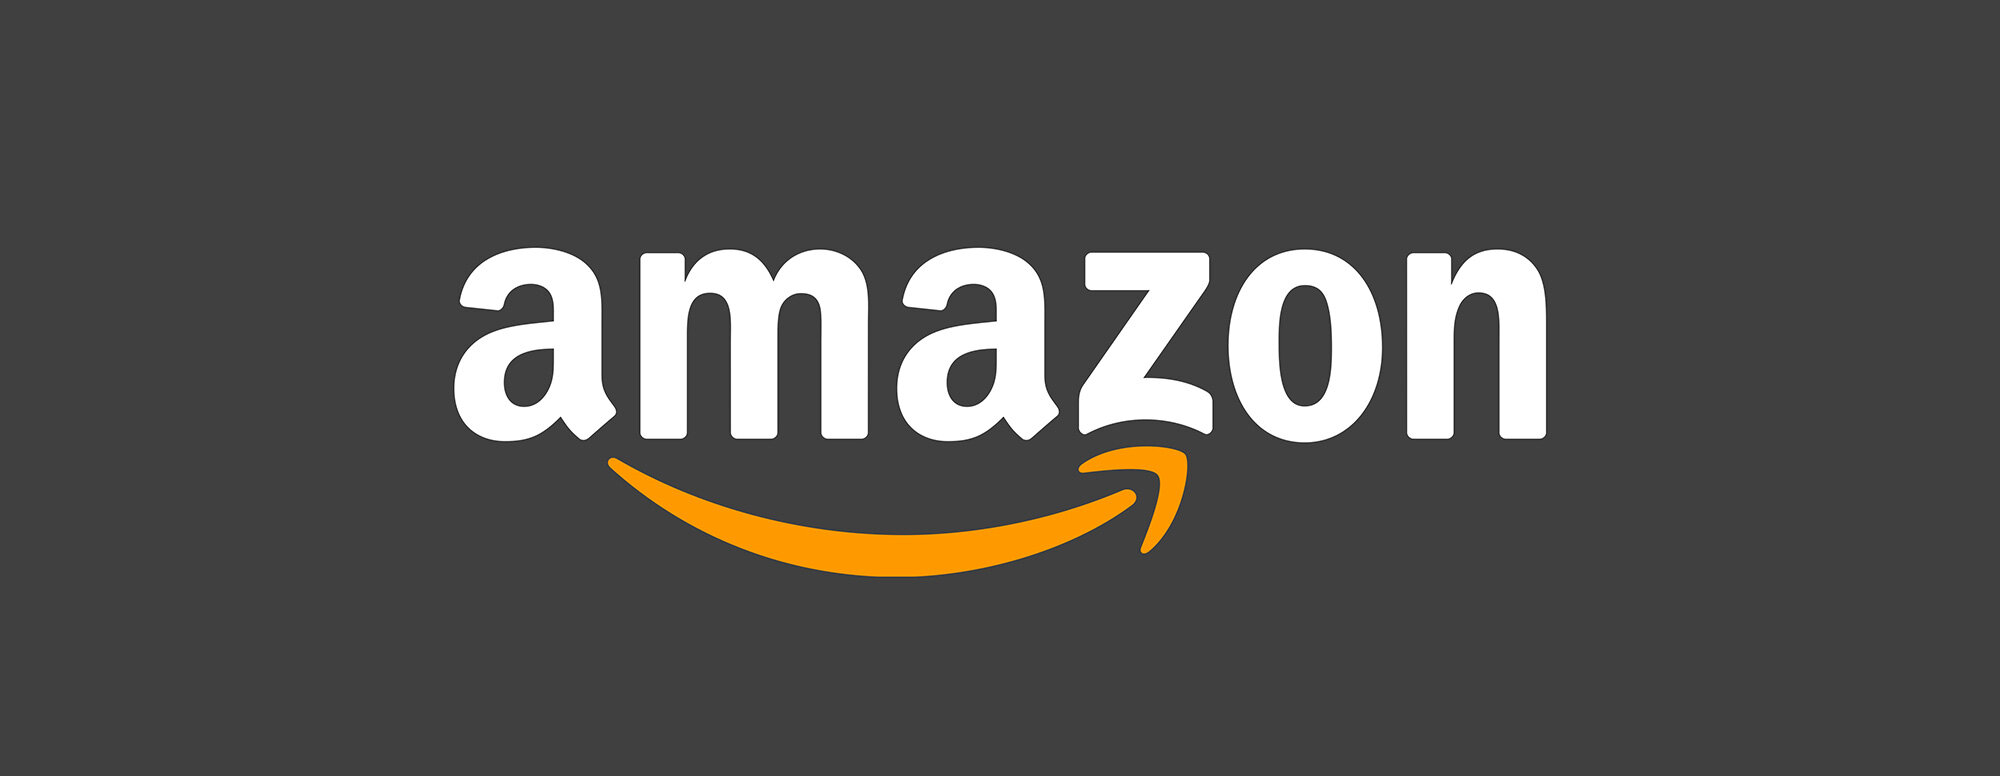

# Продажи Amazon: исследовательский анализ данных и система рекомендаций

### Содержание

* [Вступление](#introduction)
* [Источник данных](#data_source)
* [Импортирование библиотек](#importing_libraries)
* [Получение данных](#data_acquisition)
* [Оценка данных](#data_assessment)
    * [Поиск пустых ячеек](#nulls)
    * [Поиск дубликатов](#duplicates)
    * [Форматирование](#data_formats)
* [Исследование категорий](#categories)
    * [Наиболее популярные категории и подкатегории](#pop_cat)
* [Создание системы рекомендаций](#recs)
* [Вывод](#conclusions)

# Вступление <a class="anchor" id="introduction"></a>

В данном проекта мы будем производить исследовательский анализ данных о продажах Amazon.  
Amazon - американская компания, крупнейшая в мире на рынках платформ электронной коммерции и публично-облачных вычислений по выручке и рыночной капитализации.

# Источник данных <a class="anchor" id="data_source"></a>

Датасет доступен на сайте Kaggle по этой [ссылке](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset/data)

# Импортирование библиотек <a class="anchor" id="importing_libraries"></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

# Получение данных <a class="anchor" id="data_acquisition"></a>

In [6]:
df = pd.read_csv('amazon.csv', sep=',')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# Оценка данных <a class="anchor" id="data_assessment"></a>

In [7]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [8]:
df.shape

(1465, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

Колонки **discounted_price**, **actual_price**, **discount percentage** необходимо перевести в формат float 

### Поиск пустых ячеек <a class="anchor" id="nulls"></a>

In [10]:
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

В колонке rating_count есть 2 пустых ячейки:

In [11]:
df[df['rating_count'].isna()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


Строки с пустыми значениями мы удаляем:

In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

### Поиск дубликатов <a class="anchor" id="duplicates"></a>

In [14]:
df.duplicated().sum()

0

В нашем датасете нет дубликатов

### Форматирование <a class="anchor" id="data_formats"></a>

In [15]:
df['discounted_price'] = df['discounted_price'].str.replace('₹', '')
df['discounted_price'] = df['discounted_price'].str.replace(',', '')
df['discounted_price'] = df['discounted_price'].astype('float64')

In [16]:
df['actual_price'] = df['actual_price'].str.replace('₹', '')
df['actual_price'] = df['actual_price'].str.replace(',', '')
df['actual_price'] = df['actual_price'].astype('float64')

In [17]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')
df['discount_percentage'] = df['discount_percentage'].astype('float64')
df['discount_percentage'] = df['discount_percentage']/100

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1463 non-null   object 
 1   product_name         1463 non-null   object 
 2   category             1463 non-null   object 
 3   discounted_price     1463 non-null   float64
 4   actual_price         1463 non-null   float64
 5   discount_percentage  1463 non-null   float64
 6   rating               1463 non-null   object 
 7   rating_count         1463 non-null   object 
 8   about_product        1463 non-null   object 
 9   user_id              1463 non-null   object 
 10  user_name            1463 non-null   object 
 11  review_id            1463 non-null   object 
 12  review_title         1463 non-null   object 
 13  review_content       1463 non-null   object 
 14  img_link             1463 non-null   object 
 15  product_link         1463 non-null   o

В колонке rating есть аномальное значение:

In [19]:
df['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [20]:
df[df['rating']=='|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


Эту строку мы также удаляем:

In [21]:
df = df.drop(df[df['rating']=='|'].index)

In [22]:
df[df['rating']=='|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


# Исследование категорий <a class="anchor" id="categories"></a>

In [23]:
df['category'].unique()

array(['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
       'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
       'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables',
       'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
       'Electronics|HomeTheater,TV&Video|Projectors',
       'Electronics|HomeAudio|Accessories|Adapters',
       'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers',
       'Computers&Acces

Наименования категорий имеют вид, который усложняет восприятие, поэтому мы выделим категорию и подкатегорию в отдельные колонки

In [24]:
df['product_category'] = df['category'].str.split('|').str.get(0)
df['product_category'].unique()

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

In [25]:
df['product_subcategory'] = df['category'].str.split('|').str.get(1)
df['product_subcategory'].unique()

array(['Accessories&Peripherals', 'NetworkingDevices',
       'HomeTheater,TV&Video', 'HomeAudio', 'WearableTechnology',
       'Mobiles&Accessories', 'Accessories',
       'Headphones,Earbuds&Accessories', 'ExternalDevices&DataStorage',
       'Microphones', 'GeneralPurposeBatteries&BatteryChargers',
       'OfficePaperProducts', 'CraftMaterials', 'Cameras&Photography',
       'OfficeElectronics', 'Printers,Inks&Accessories', 'Monitors',
       'Components', 'Electrical', 'Arts&Crafts', 'PowerAccessories',
       'Tablets', 'Laptops', 'Kitchen&HomeAppliances',
       'Heating,Cooling&AirQuality', 'Kitchen&Dining',
       'HomeStorage&Organization', 'CarAccessories',
       'HomeMedicalSupplies&Equipment'], dtype=object)

## Наиболее популярные категории и подкатегории <a class="anchor" id="pop_cat"></a>

In [26]:
df.groupby('product_category', as_index=False)['product_id'].count().sort_values(by = 'product_id', ascending=False)

,product_category,product_id
2,Electronics,526
1,Computers&Accessories,451
4,Home&Kitchen,447
7,OfficeProducts,31
5,HomeImprovement,2
6,MusicalInstruments,2
0,Car&Motorbike,1
3,Health&PersonalCare,1
8,Toys&Games,1


Text(0.5, 1.0, 'Количество покупок по категориям')

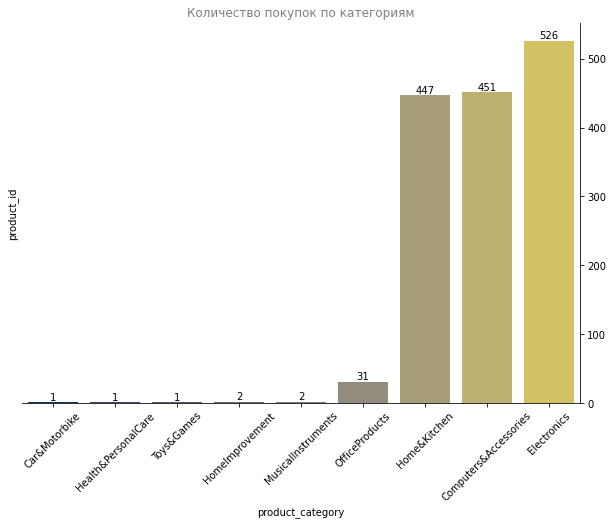

In [48]:
cat_count = df.groupby('product_category', as_index=False)['product_id'].count().reset_index()

fig = plt.figure(figsize=(10,7))

ax = sns.barplot(data = cat_count, x = 'product_category', y = 'product_id', palette='cividis', order=cat_count.sort_values('product_id').product_category)

plt.xticks(rotation=45)

sns.despine(left=True, right=False) 

for i in ax.containers:
    ax.bar_label(i,)

plt.title('Количество покупок по категориям', color = 'gray')

Самая популярная категория - это электроника

In [28]:
subcat_count = df.groupby('product_subcategory')['product_id'].count().sort_values(ascending=False).reset_index().head(10)
subcat_count

,product_subcategory,product_id
0,Accessories&Peripherals,379
1,Kitchen&HomeAppliances,307
2,"HomeTheater,TV&Video",162
3,Mobiles&Accessories,161
4,"Heating,Cooling&AirQuality",116
5,WearableTechnology,76
6,"Headphones,Earbuds&Accessories",66
7,NetworkingDevices,34
8,OfficePaperProducts,27
9,ExternalDevices&DataStorage,18


Text(0.5, 1.0, 'Количество покупок по подкатегориям')

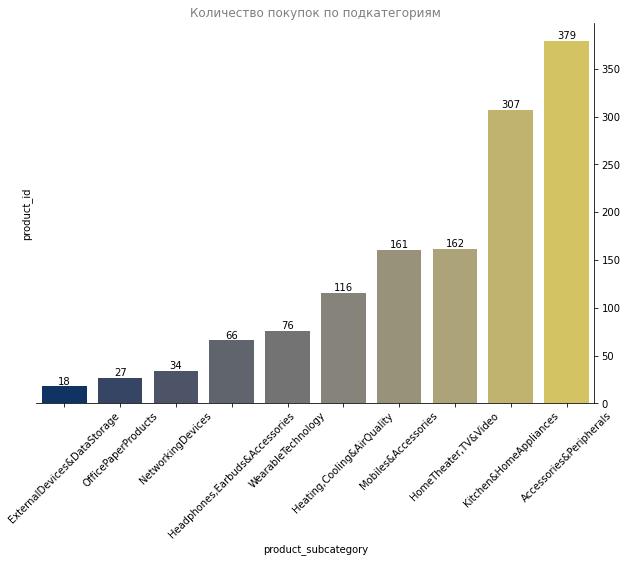

In [49]:
fig = plt.figure(figsize=(10,7))

ax = sns.barplot(data = subcat_count, x = 'product_subcategory', y = 'product_id', palette='cividis', order=subcat_count.sort_values('product_id').product_subcategory)

plt.xticks(rotation=45)

sns.despine(left=True, right=False) 

for i in ax.containers:
    ax.bar_label(i,)

plt.title('Количество покупок по подкатегориям', color = 'gray')

Наиболее популярная подкатегория - это аксессуары и внешние устройства.

In [30]:
df.groupby('product_category')[('actual_price', 'discounted_price')].mean().sort_values(by='actual_price', ascending=False).round(2)

C:\Users\HP\AppData\Local\Temp\ipykernel_14900\4107810190.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('product_category')[('actual_price', 'discounted_price')].mean().sort_values(by='actual_price', ascending=False).round(2)


,actual_price,discounted_price
product_category,,
Electronics,10127.31,5965.89
Home&Kitchen,4165.79,2331.13
Car&Motorbike,4000.00,2339.00
Health&PersonalCare,1900.00,899.00
Computers&Accessories,1686.66,845.39
MusicalInstruments,1347.00,638.00
HomeImprovement,799.00,337.00
OfficeProducts,397.19,301.58
Toys&Games,150.00,150.00


Категория с наиболее высоским средним значением цены и цены со скидкой - это также электроника.

In [31]:
df.groupby('product_subcategory')[('actual_price', 'discounted_price')].mean().sort_values(by='actual_price', ascending=False).round(2).head(15)

C:\Users\HP\AppData\Local\Temp\ipykernel_14900\2826794268.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('product_subcategory')[('actual_price', 'discounted_price')].mean().sort_values(by='actual_price', ascending=False).round(2).head(15)


,actual_price,discounted_price
product_subcategory,,
Laptops,59890.00,37247.00
Tablets,37999.00,26999.00
"HomeTheater,TV&Video",17235.69,10407.12
Monitors,16430.00,8199.00
Mobiles&Accessories,9754.50,7134.05
WearableTechnology,8554.76,2339.70
"Heating,Cooling&AirQuality",5908.98,3222.32
ExternalDevices&DataStorage,4303.06,2151.39
CarAccessories,4000.00,2339.00


Подкатегория с наиболее высоким средним значением цены и цены со скидкой - это ноутбуки.

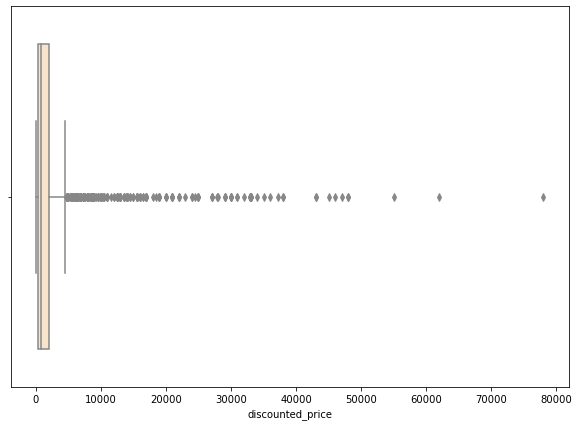

In [32]:
f = plt.figure(figsize=(10, 7))

ax = sns.boxplot(data = df, x = 'discounted_price', color = 'bisque')

На графике по цене со скидкой наблюдается множество выбросов

In [33]:
df.sort_values(by='discounted_price', ascending=False)['product_subcategory'][:10]

249           HomeTheater,TV&Video
325           HomeTheater,TV&Video
255           HomeTheater,TV&Video
192           HomeTheater,TV&Video
283           HomeTheater,TV&Video
332           HomeTheater,TV&Video
276           HomeTheater,TV&Video
533            Mobiles&Accessories
216           HomeTheater,TV&Video
1354    Heating,Cooling&AirQuality
Name: product_subcategory, dtype: object

Выбросы представлены товарами с высокой ценой из подкатегории Домашние кинотеатры и ТВ/Видео оборудование

# Создание системы рекомендаций<a class="anchor" id="recs"></a>

Для ускорения процесса обработки переводим user id в тип данных category

In [34]:
df['user_id_category'] = df['user_id'].astype('category')

Теперь отбираем 1000 клиентов и создаем словарь, по которому будем заменять длинные id на числа 0-1000

In [35]:
target_cust = df['user_id_category'].unique()[:1000]
cust_dict = {id: i for i, id in enumerate(target_cust)}
len(cust_dict)

1000

Создаем даатфрейм с нашей 1000 клиентов, которые будем исследовать в рамках создания системы рекомендаций

In [36]:
rec = df[df['user_id_category'].isin(target_cust)].copy()
rec.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_category,product_subcategory,user_id_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH..."


Заменяем оригинальный user id по словарю

In [37]:
tqdm.pandas()

def replace(x):
    n_id = 0
    try:
      n_id = cust_dict[x.user_id_category]
    except Exception as e:
        print(e)
        res = -1
    return n_id

rec['user_id'] = rec.progress_apply(replace, axis=1)
rec.head()

100%|██████████| 1271/1271 [00:00<00:00, 13912.24it/s]


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_category,product_subcategory,user_id_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,0,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,"43,994","Compatible with all Type C enabled devices, be...",1,"ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,2,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,3,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,4,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH..."


In [38]:
rec['user_id'].nunique()

1000

Группируем данные для последующего создания матрицы

In [39]:
gr = rec.groupby(['user_id', 'product_name'])['product_id'].count()
gr

user_id  product_name                                                                                                                                                                
0        Wayona Nylon Braided (2 Pack) Lightning Fast Usb Data Cable Fast Charger Cord For Iphone, Ipad Tablet (3 Ft Pack Of 2, Grey)                                                    1
         Wayona Nylon Braided 2M / 6Ft Fast Charge Usb To Lightning Data Sync And Charging Cable For Iphone, Ipad Tablet (6 Ft Pack Of 1, Grey)                                          1
         Wayona Nylon Braided 3A Lightning to USB A Syncing and Fast Charging Data Cable for iPhone, Ipad (3 FT Pack of 1, Black)                                                        1
         Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)              3
         Wayona Nylon Braided Usb Syncing And Charging Cable Sync And 

Создаем матрицу, где индекс - это user id, а колонки - это наименования товаров

In [40]:
matrix_cust = gr.unstack('product_name')
matrix_cust

product_name,!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!,"10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor","10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox","3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3"" x 3"" Size | For notes, reminders, study, school and organizing","3M Scotch Double Sided Heavy Duty Tape(1m holds 4.5Kgs) for indoor hanging applications (Photo frames, Mirrors, Key Holders, Car Interiors, Extension Boards, Wall decoration, etc)(L: 3m, W: 24mm)",7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart tv Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys,7SEVEN® Bluetooth Voice Command Remote for Xiaomi Redmi Mi Smart TV with Netflix & Prime Video Hot Keys XMRM-00A,7SEVEN® Compatible Lg Smart Tv Remote Suitable for Any LG LED OLED LCD UHD Plasma Android Television and AKB75095303 replacement of Original Lg Tv Remote Control,7SEVEN® Compatible Tata Sky Remote Control Replacement of Original dth SD HD tata Play Set top Box Remote - IR Learning Universal Remote for Any Brand TV - Pairing Must,7SEVEN® Compatible Vu Smart Tv Remote Control Suitable for Original 4K Android LED Ultra HD UHD Vu Tv Remote with Non Voice Feature without google assistant,...,"pTron Solero T351 3.5Amps Fast Charging Type-C to Type-C PD Data & Charging USB Cable, Made in India, 480Mbps Data Sync, Durable 1 Meter Long Cable for Type-C Smartphones, Tablets & Laptops (Black)","pTron Solero TB301 3A Type-C Data and Fast Charging Cable, Made in India, 480Mbps Data Sync, Strong and Durable 1.5-Meter Nylon Braided USB Cable for Type-C Devices for Charging Adapter (Black)","pTron Volta Dual Port 12W Smart USB Charger Adapter, Multi-Layer Protection, Made in India, BIS Certified, Fast Charging Power Adaptor Without Cable for All iOS & Android Devices (Black)","realme 10W Fast Charging Micro-USB Cable (Braided, Black)",realme Buds Classic Wired in Ear Earphones with Mic (Black),"realme Buds Wireless in Ear Bluetooth Earphones with mic, 11.2mm Bass Boost Driver, Magnetic Fast Pair, Fast Charging and 12 Hrs Playtime (Yellow)","realme narzo 50 (Speed Blue, 4GB RAM+64GB Storage) Helio G96 Processor | 50MP AI Triple Camera | 120Hz Ultra Smooth Display","realme narzo 50i (Mint Green, 2GB RAM+32GB Storage) Octa Core Processor | 6.5"" inch Large Display","rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver","tizum HDMI to VGA Adapter Cable 1080P for Projector, Computer, Laptop, TV, Projectors & TV"
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Применим лямбда функцию, чтобы заменить значения на численные

In [41]:
matrix_cust = matrix_cust.applymap(lambda x: 1 if x > 0 else 0)
matrix_cust

product_name,!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!,"10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor","10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox","3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3"" x 3"" Size | For notes, reminders, study, school and organizing","3M Scotch Double Sided Heavy Duty Tape(1m holds 4.5Kgs) for indoor hanging applications (Photo frames, Mirrors, Key Holders, Car Interiors, Extension Boards, Wall decoration, etc)(L: 3m, W: 24mm)",7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart tv Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys,7SEVEN® Bluetooth Voice Command Remote for Xiaomi Redmi Mi Smart TV with Netflix & Prime Video Hot Keys XMRM-00A,7SEVEN® Compatible Lg Smart Tv Remote Suitable for Any LG LED OLED LCD UHD Plasma Android Television and AKB75095303 replacement of Original Lg Tv Remote Control,7SEVEN® Compatible Tata Sky Remote Control Replacement of Original dth SD HD tata Play Set top Box Remote - IR Learning Universal Remote for Any Brand TV - Pairing Must,7SEVEN® Compatible Vu Smart Tv Remote Control Suitable for Original 4K Android LED Ultra HD UHD Vu Tv Remote with Non Voice Feature without google assistant,...,"pTron Solero T351 3.5Amps Fast Charging Type-C to Type-C PD Data & Charging USB Cable, Made in India, 480Mbps Data Sync, Durable 1 Meter Long Cable for Type-C Smartphones, Tablets & Laptops (Black)","pTron Solero TB301 3A Type-C Data and Fast Charging Cable, Made in India, 480Mbps Data Sync, Strong and Durable 1.5-Meter Nylon Braided USB Cable for Type-C Devices for Charging Adapter (Black)","pTron Volta Dual Port 12W Smart USB Charger Adapter, Multi-Layer Protection, Made in India, BIS Certified, Fast Charging Power Adaptor Without Cable for All iOS & Android Devices (Black)","realme 10W Fast Charging Micro-USB Cable (Braided, Black)",realme Buds Classic Wired in Ear Earphones with Mic (Black),"realme Buds Wireless in Ear Bluetooth Earphones with mic, 11.2mm Bass Boost Driver, Magnetic Fast Pair, Fast Charging and 12 Hrs Playtime (Yellow)","realme narzo 50 (Speed Blue, 4GB RAM+64GB Storage) Helio G96 Processor | 50MP AI Triple Camera | 120Hz Ultra Smooth Display","realme narzo 50i (Mint Green, 2GB RAM+32GB Storage) Octa Core Processor | 6.5"" inch Large Display","rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver","tizum HDMI to VGA Adapter Cable 1080P for Projector, Computer, Laptop, TV, Projectors & TV"
user_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Мы будем использовать косинусное сходство для идентификации клиентов с похожими покупками

In [42]:
cos_sim = cosine_similarity(matrix_cust, matrix_cust)
cos_sim 

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [43]:
cos_sim_df = pd.DataFrame(cos_sim)
cos_sim_df.columns = matrix_cust.index
cos_sim_df['user_id'] = matrix_cust.index
cos_sim_df = cos_sim_df.set_index('user_id')

cos_sim_df.head()

user_id,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
user_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Теперь найдем user id с высоким значение косинусного сходства

In [44]:
col_list = list(cos_sim_df)
cos_sim_df['sum'] = cos_sim_df[col_list].sum(axis=1).round(2)

In [45]:
cos_sim_df[cos_sim_df['sum']>1]

user_id,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,sum
user_id,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.82
15,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00
26,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.58
67,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00
215,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00
261,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.58
271,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.50
275,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00
279,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00


In [46]:
cos_sim_df.loc[5].sort_values(ascending=False)

user_id
sum    1.820000
5      1.000000
294    0.816497
673    0.000000
661    0.000000
         ...   
340    0.000000
341    0.000000
342    0.000000
343    0.000000
500    0.000000
Name: 5, Length: 1001, dtype: float64

Найдем рекомендации для клиента с user_id 296:

Клиент с user id 5 купил следующие товары:

In [ ]:
cust_a = matrix_cust.loc[5]

cust_a_purchases = cust_a[cust_a > 0].index.tolist()
cust_a_purchases

Клиент с user id 296 купил следующие товары:

In [ ]:
cust_b = matrix_cust.loc[296]

cust_b_purchases = cust_b[cust_b > 0].index.tolist()
cust_b_purchases

Вот эти товары мы можем порекомендовать клиенту с user id 296:

In [ ]:
b_recs = set(cust_a_purchases) - set(cust_b_purchases)
b_recs

In [ ]:
rec[rec['user_id']==296]

Найдем рекомендации для клиента с user_id 412:

In [ ]:
cos_sim_df.loc[263].sort_values(ascending=False)

Вот эти товары мы можем порекомендовать клиенту с user id 412:

In [ ]:
cust_a = matrix_cust.loc[263]
cust_a_purchases = cust_a[cust_a > 0].index.tolist()
cust_a_purchases

cust_b = matrix_cust.loc[412]
cust_b_purchases = cust_b[cust_b > 0].index.tolist()
cust_b_purchases

b_recs = set(cust_a_purchases) - set(cust_b_purchases)
b_recs

# Вывод <a class="anchor" id="conclusions"></a>

В рамках данного мини-проекта мы произвели исследовательский анализ данных по продажам компании Amazon и выявили самые популярные категории и подкатегории товаров. Мы также создали простую систему рекомендаций, которую можно использовать для продвижения определенных товаров.